In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk = np.cumsum(steps)

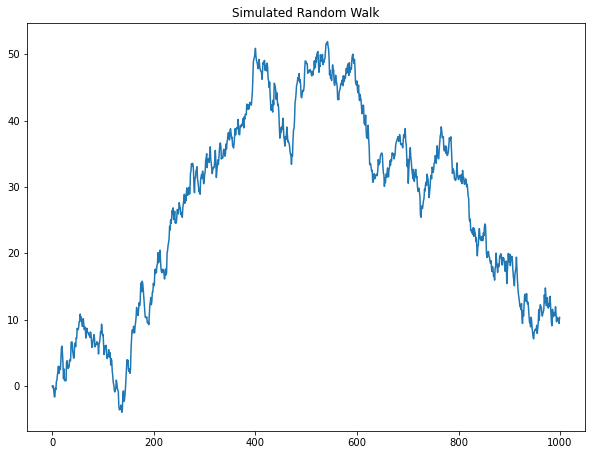

In [ ]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


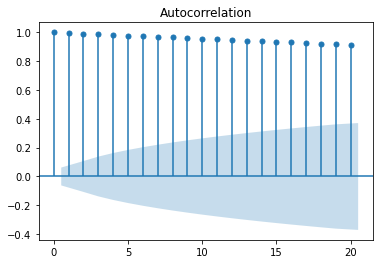

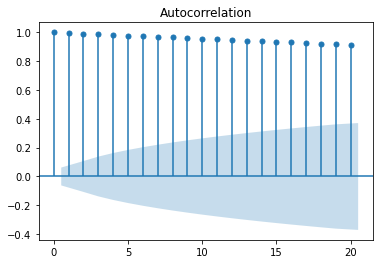

In [ ]:
random_walk_acf_coef = acf(random_walk)
plot_acf(random_walk, lags=20)

In [ ]:
random_walk_diff = np.diff(random_walk, n=1)

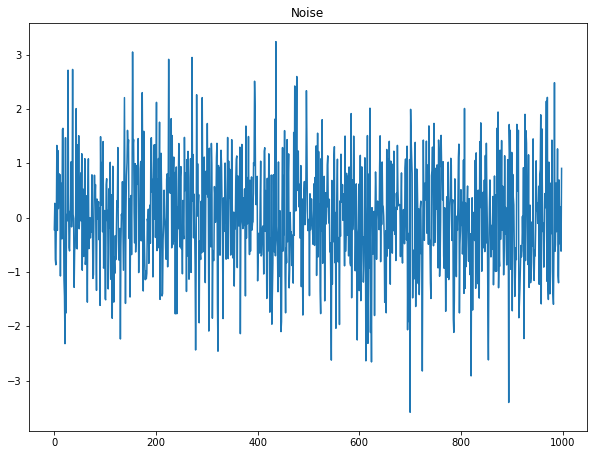

In [ ]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk_diff)
plt.title('Noise')
plt.show()


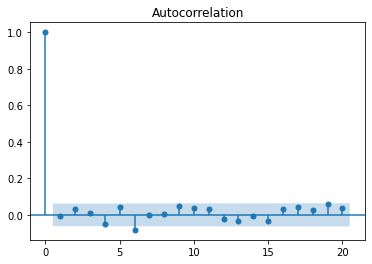

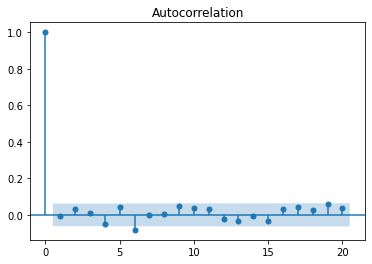

In [ ]:
plot_acf(random_walk_diff, lags=20)

![image.png](attachment:image.png)

In [ ]:
ar2 = np.array([1,2])
ma2 = np.array([1])

In [ ]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

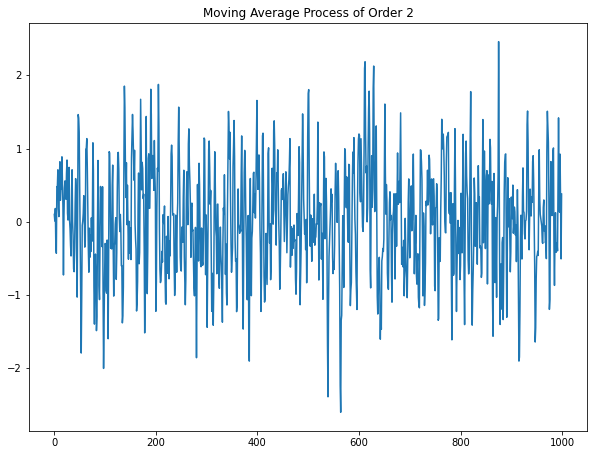

In [ ]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

![image.png](attachment:image.png)

In [ ]:
ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1])
simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

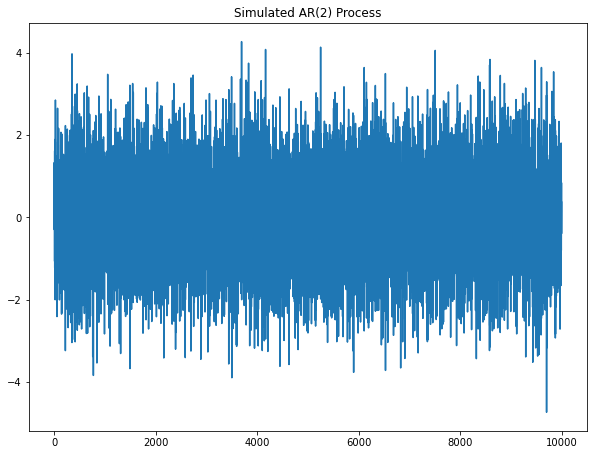

In [ ]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

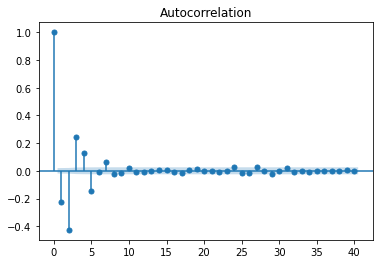

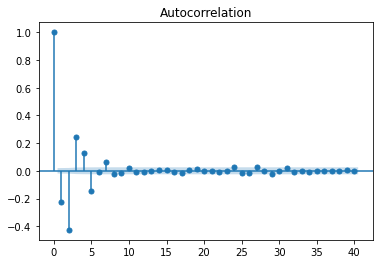

In [ ]:
plot_acf(simulated_AR2_data)

The coefficient is slowly decaying. This means that it is unlikely a moving average process and it suggests that the time series can probably be modelled with an autoregressive process

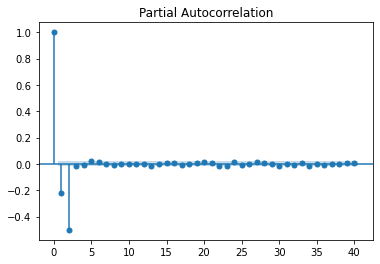

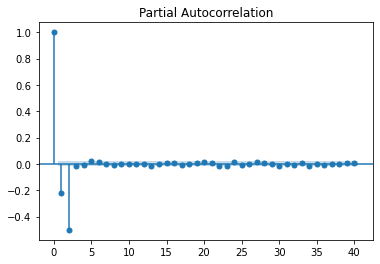

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_AR2_data)

Order q of the process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time.
The coefficients are not significant after lag 2. Therefore, the partial autocorrelation plot is useful to determine the order of an AR(p) process

Yule-Walker equation. This equations allows us to estimate the coefficients of an AR(p) model, given that we know the order

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\HP\Downloads\jj.csv')
data.head()

FileNotFoundError: ignored

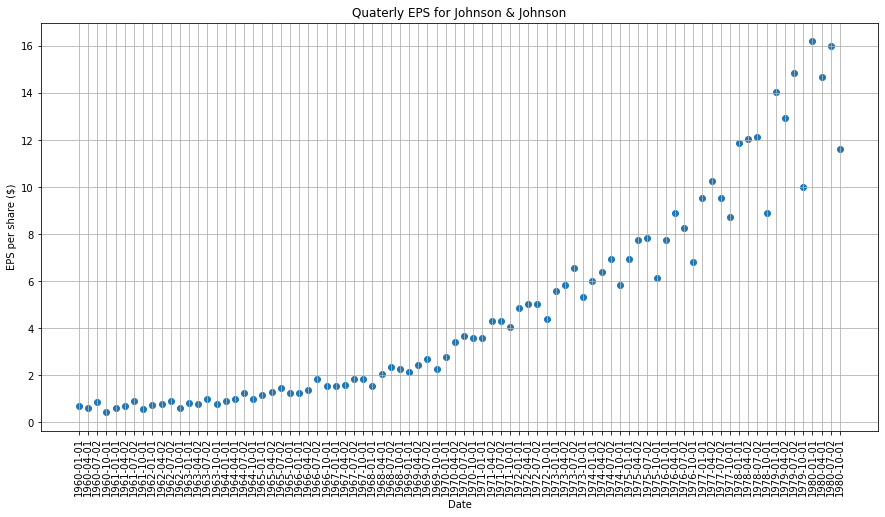

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quaterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# Take the log difference to make data stationary
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


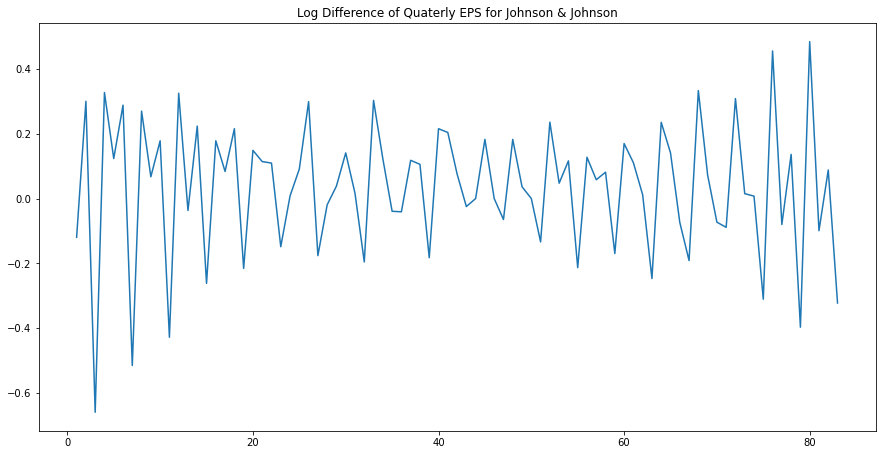

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quaterly EPS for Johnson & Johnson")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811827
p-value: 0.0004149731404440817


a large negative ADF statistic and p-value smaller than 0.05, we can reject the null hypothesis and say that our time series is stationary

In [ ]:
plot_pacf(data['data'])
plot_acf(data['data'])

In [ ]:
# Try a AR(4) model
from statsmodels.regression.linear_model import yule_walker
rho, sigma = yule_walker(data['data'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175


y=0.11+0.64 y(t-1)+0.54y(t-2)+0.5 y(t-3)-0.28y(t-4)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

![image.png](attachment:image.png)

In [ ]:
ar1 = np.array([1, 3])
ma1 = np.array([1, 4])
simulated_ARMA_data = ArmaProcess(ar1, ma1).generate_sample(nsample=10000)

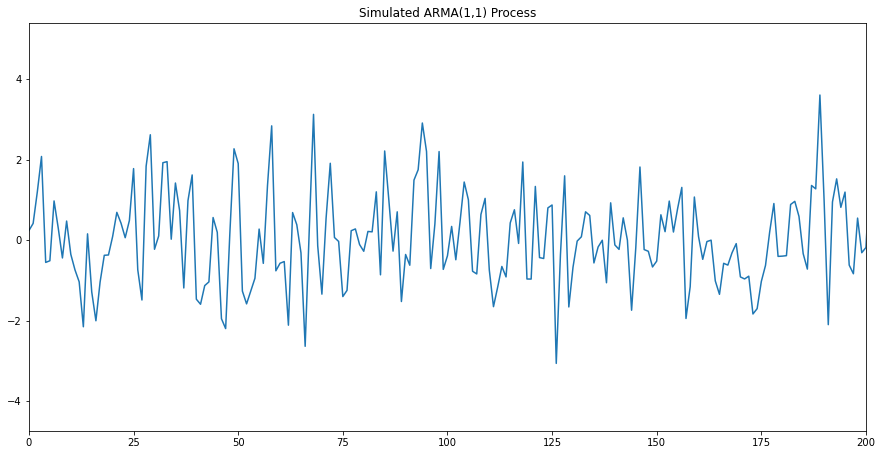

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA_data)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

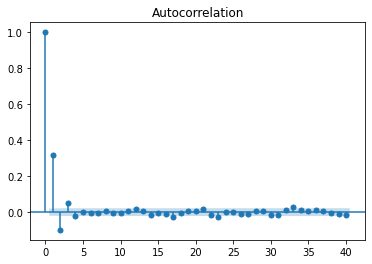

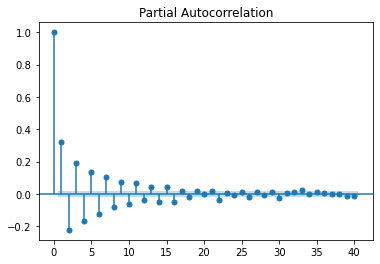

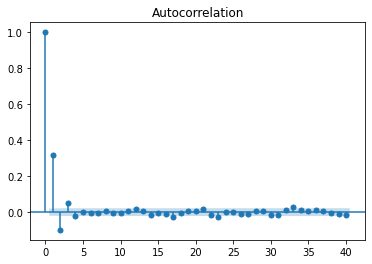

In [ ]:
plot_pacf(simulated_ARMA_data)


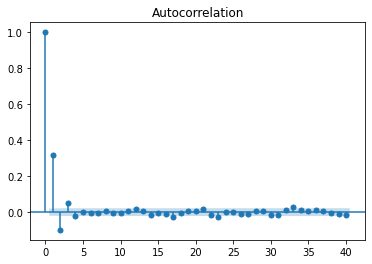

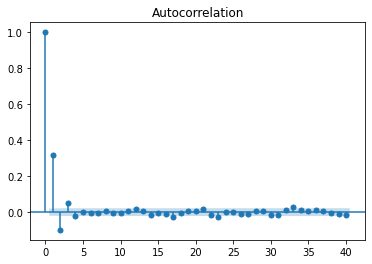

In [ ]:
plot_acf(simulated_ARMA_data)

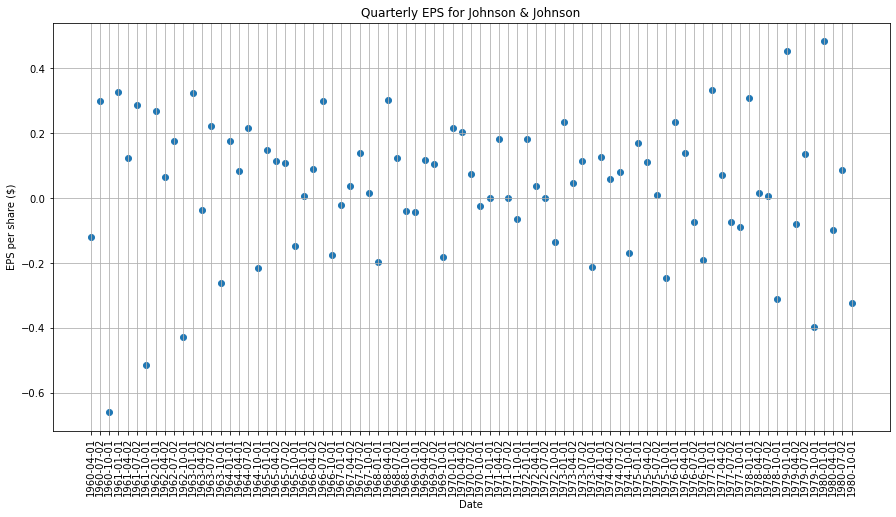

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811827
p-value: 0.0004149731404440817


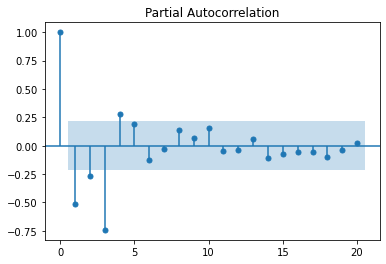

In [ ]:
plot_pacf(data['data'])


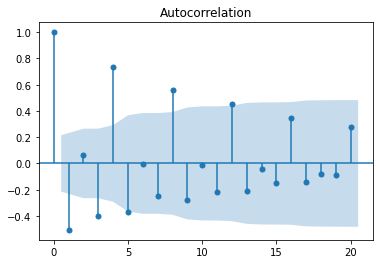

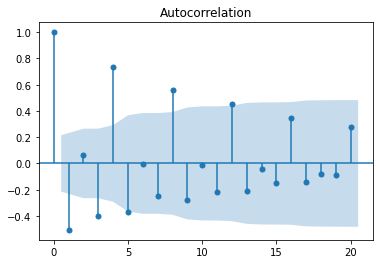

In [ ]:
plot_acf(data['data'])

In [ ]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df